# Marketing A/B Testing

This project investigates whether our advertising campaigns genuinely convert prospects into paying customers by comparing purchase behavior between a treatment group exposed to the ads and a control group that is not. Through rigorous statistical testing of these cohorts, we will determine whether any lift in conversions is statistically significant, ensuring that observed differences are not the result of random variation. Establishing clear, data-driven evidence of ad impact is vital: it guides budget allocation, prevents wasted spend on under-performing tactics, and pinpoints where creative, targeting, or timing refinements can most effectively drive revenue growth.

In [38]:
## lIBRARIES ##

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

We begin by importing the necessary **Python libraries** for data manipulation, analysis, and visualization. `pandas` is used for handling and transforming structured data, while `numpy` supports numerical operations and array manipulation. `matplotlib.pyplot` and `seaborn` are utilized for creating visualizations to explore and present data insights. The `warnings` library is included to manage and suppress unnecessary warning messages during execution.

In [39]:
## Load the dataset

df = pd.read_csv('marketing_AB.csv')

In [40]:
## Look at the first few lines of the dataset

df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


The `head()` function in Python, commonly used with pandas DataFrames, displays the first few rows of a dataset—by default, the first five. This provides a quick preview of the data's structure, including column names, data types, and example values, which helps in understanding the nature and format of the loaded dataset.

We will examine the data for any duplicate individuals to ensure each participant is uniquely represented in the A/B test, maintaining the integrity of the experimental design. 

In [41]:
## Check for any duplicates of the 'user id' column

df.duplicated(subset = 'user id').sum()

0

After confirming that there are no duplicate individuals in the dataset, we proceed to remove unnecessary columns—specifically **`'user_id'`** and **`'Unnamed: 0'`** —as they do not contribute meaningful information for our analysis.

In [42]:
## Drop any unnecessary columns 

df.drop(['Unnamed: 0', 'user id'], axis = 1, inplace = True)

We should verify that the specified columns have been successfully removed and review the remaining columns in the dataset.

In [43]:
## Check columns

df.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

Now to examine the categorical variables to ensure they contain a reasonable and appropriate number of distinct levels for analysis.

In [44]:
## Check if the categorical variables have appropriate number of levels

df_cat = df[['test group', 'converted', 'most ads day', 'most ads hour']]
df_cat.nunique()

test group        2
converted         2
most ads day      7
most ads hour    24
dtype: int64

In [45]:
## Check if the categorical variables have appriate levels

for i in df_cat.columns:
    print(i.upper(), ":", df_cat[i].unique())

TEST GROUP : ['ad' 'psa']
CONVERTED : [False  True]
MOST ADS DAY : ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
MOST ADS HOUR : [20 22 18 10 14 13 19 11 12 16 21  3 23  4  8  0  2 15  1  6 17  7  9  5]


### Univariate Analysis

Univariate analysis is the process of examining the distribution and characteristics of a single variable in isolation. In A/B testing, it plays a critical role in understanding the underlying structure of the data before performing any comparisons between the test groups. By analyzing each variable individually—such as conversion rates, time spent on site, or number of purchases—analysts can detect issues like missing values, outliers, or skewed distributions that might bias the results. This step also helps validate assumptions required for statistical testing, such as normality or equal variance, and ensures that each variable behaves as expected within each group. Overall, univariate analysis provides a foundation for reliable A/B testing by ensuring data quality and establishing a clear understanding of the metrics under consideration.

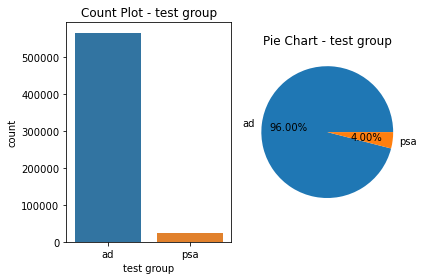

In [46]:
variable = 'test group'

plt.figure(figsize = (6, 4))

## Count Plot 
plt.subplot(1,2,1)
sns.countplot(x = variable, data = df_cat)
plt.title(f'Count Plot - {variable}')

## Pie Chart
plt.subplot(1,2,2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels = counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart - {variable}')


## Adjust layout 
plt.tight_layout()

## Show plots 
plt.show()

Using `matplotlib.pyplot`, we visualize the distribution of observations in the advertisement group compared with those in the public service announcement (PSA) group.


The data show roughly 58,000 observations in the advertisement group and about 2,000 in the public-service-announcement group. A pie chart offers a another visual of this imbalance as a total, highlighting the stark difference in group sizes.The public-service-announcement(psa) variant was delivered to roughly **4%** of the total user base. 

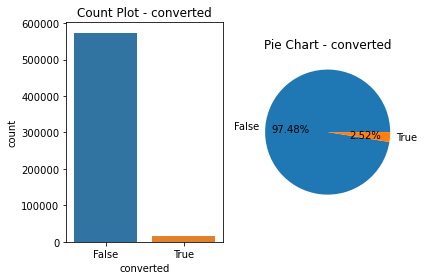

In [47]:
variable_2 = 'converted'

plt.figure(figsize = (6, 4))

## Count Plot 
plt.subplot(1,2,1)
sns.countplot(x = variable_2, data = df_cat)
plt.title(f'Count Plot - {variable_2}')

## Pie Chart
plt.subplot(1,2,2)
counts = df_cat[variable_2].value_counts()
plt.pie(counts, labels = counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart - {variable_2}')


## Adjust layout 
plt.tight_layout()

## Show plots 
plt.show()

The conversion analysis shows that **2.52%** of users completed a purchase(True), while the remaining **97.48%** did not(False). This baseline highlights the overall conversion rate before comparing performance between the ad and PSA groups.

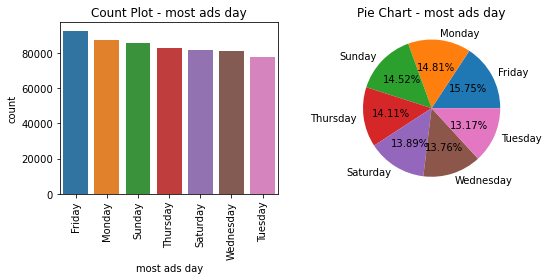

In [48]:
variable_3 = 'most ads day'

plt.figure(figsize = (8, 4))

## Count Plot 
plt.subplot(1,2,1)
sns.countplot(x = variable_3, data = df_cat, order = df_cat['most ads day'].value_counts().index)
plt.title(f'Count Plot - {variable_3}')
plt.xticks(rotation=90)

## Pie Chart
plt.subplot(1,2,2)
counts = df_cat[variable_3].value_counts()
plt.pie(counts, labels = counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart - {variable_3}')


## Adjust layout 
plt.tight_layout()

## Show plots 
plt.show()

Examining the daily distribution reveals that ad impressions peak on Friday, with Monday and Sunday following as the next most active days. 

Knowing which days draw the most ad impressions lets you concentrate budget and fresh creative on peak days (Friday, then Monday and Sunday), trim spend mid-week, and time promotions for maximum reach. Pairing these traffic spikes with conversion data also pinpoints when users are most likely to buy, guiding both campaign scheduling and inventory or staffing plans.

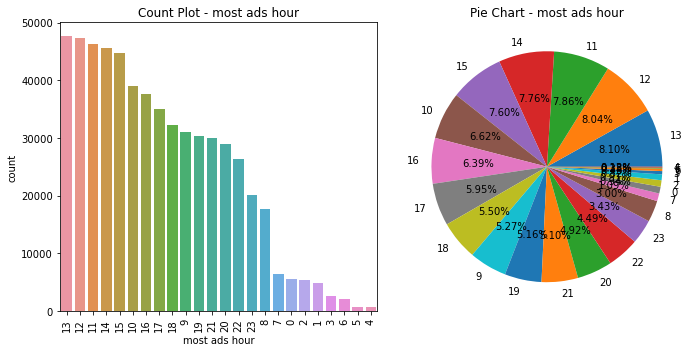

In [49]:
variable_4 = 'most ads hour'

plt.figure(figsize = (10, 5))

## Count Plot 
plt.subplot(1,2,1)
sns.countplot(x = variable_4, data = df_cat, order = df_cat['most ads hour'].value_counts().index)
plt.title(f'Count Plot - {variable_4}')
plt.xticks(rotation=90)

## Pie Chart
plt.subplot(1,2,2)
counts = df_cat[variable_4].value_counts()
plt.pie(counts, labels = counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart - {variable_4}')


## Adjust layout 
plt.tight_layout()

## Show plots 
plt.show()

Analyzing the hourly distribution reveals a pronounced spike in ad impressions between 11:00 AM and 3:00 PM.

Knowing that impressions spike between 11 AM and 3 PM lets you “day-part” campaigns—raising bids or budgets during those high-traffic hours, testing fresh creative when users are most active, and scaling back spend when reach is low. Aligning this window with conversion data also surfaces the hours when shoppers are likeliest to buy, informing promo timing, inventory planning, and customer-support staffing.

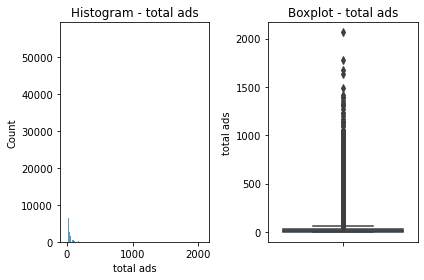

In [50]:
variable_5 = 'total ads'

plt.figure(figsize = (6,4))

## Histogram 
plt.subplot(1,2,1)
sns.histplot(x = variable_5, data=df)
plt.title(f'Histogram - {variable_5}')

## Pie Chart 
plt.subplot(1,2,2)
sns.boxplot(y = variable_5, data=df)
plt.title(f'Boxplot - {variable_5}')

## Adjust Layout
plt.tight_layout()

## Show plots
plt.show()

Using a histogram and box plot to examine the total ad-count distribution, we observe noticeable skewness in the data.

Apply the pandas `.describe()` method to the **`total_ads`** column to generate summary statistics—count, mean, standard deviation, and quartiles—which offer a quick snapshot of the column’s distribution.



In [51]:
## Check the descriptive stats of this feature
df['total ads'].describe()

count    588101.000000
mean         24.820876
std          43.715181
min           1.000000
25%           4.000000
50%          13.000000
75%          27.000000
max        2065.000000
Name: total ads, dtype: float64

Using the summary statistics, we can identify and exclude outliers in the **`total_ads`** column, yielding a clearer view of its true distribution in our visualizations. For this analysis, observations with a **`total_ads`** value above approximately 50 will be excluded to minimize the influence of extreme outliers on the distribution.


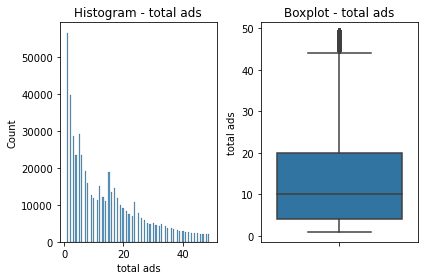

In [52]:
plt.figure(figsize = (6,4))

## Histogram 
plt.subplot(1,2,1)

## Filter the data for a value close to 75th percentile only for better visualization
sns.histplot(x = variable_5, data = df[df['total ads'] < 50])
plt.title(f'Histogram - {variable_5}')

## Pie Chart 
plt.subplot(1,2,2)
sns.boxplot(y = variable_5, data = df[df['total ads'] < 50])
plt.title(f'Boxplot - {variable_5}')

## Adjust Layout
plt.tight_layout()

## Show plots
plt.show()

### Bivariate Analysis 

Bivariate analysis lets you directly examine how the test variant (A vs. B) relates to the key metric—such as conversion rate—before running formal significance tests. It confirms that randomization produced balanced groups, provides an early sense of treatment effect size and direction, and highlights any data issues (e.g., skew or outliers) that might influence which statistical test you choose. In short, it bridges initial data exploration and rigorous hypothesis testing, ensuring cleaner, more reliable A/B-test conclusions.

In [53]:
## Check columns 
df.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

converted      False      True
test group                    
ad          0.974453  0.025547
psa         0.982146  0.017854


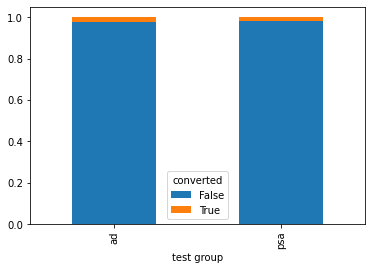

In [54]:
## Crosstab on test group
ct_conversion_test_group = pd.crosstab(df['test group'], df['converted'], normalize = 'index')
print(ct_conversion_test_group)

## Visualization to get the stacked plot chart
ct_conversion_test_group.plot.bar(stacked = True);

The advertising(**ad**) test group produced a **2.55%** conversion rate, whereas the public-service-announcement(**psa**) test group converted at **1.79%**. We will perform additional analysis to determine whether this difference is statistically significant later on.

converted        False      True
most ads day                    
Monday        0.967188  0.032812
Tuesday       0.970160  0.029840
Wednesday     0.975058  0.024942
Sunday        0.975524  0.024476
Friday        0.977788  0.022212
Thursday      0.978429  0.021571
Saturday      0.978949  0.021051


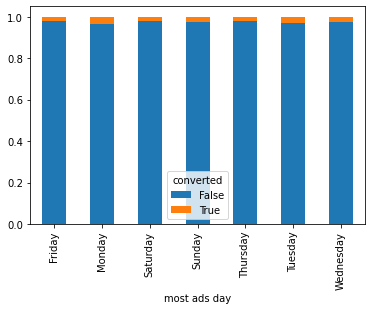

In [55]:
## Crosstab on day
ct_conversion_day = pd.crosstab(df['most ads day'], df['converted'], normalize = 'index')
print(ct_conversion_day.sort_values(by = True, ascending = False))

## Visualization to get the stacked plot chart
ct_conversion_day.plot.bar(stacked = True);

We can see that **Monday** (**3.28%** conversion) and **Tuesday** (**2.98%**) outperform the rest of the week and lets you concentrate spend and fresh creative when customers are most responsive, improving return on ad spend. It also helps the business time product launches, email pushes, and inventory or staffing decisions to match peak purchasing intent—turning the same budget into more sales and a smoother operational plan.

converted         False      True
most ads hour                    
16             0.969228  0.030772
20             0.970197  0.029803
15             0.970347  0.029653
21             0.971077  0.028923
17             0.971790  0.028210
14             0.971937  0.028063
18             0.972620  0.027380
19             0.973280  0.026720
22             0.973895  0.026105
13             0.975323  0.024677
12             0.976172  0.023828
23             0.977338  0.022662
6              0.977756  0.022244
11             0.977884  0.022116
10             0.978479  0.021521
5              0.979085  0.020915
8              0.980484  0.019516
9              0.980809  0.019191
0              0.981575  0.018425
7              0.981889  0.018111
4              0.984765  0.015235
1              0.987089  0.012911
3              0.989548  0.010452
2              0.992687  0.007313


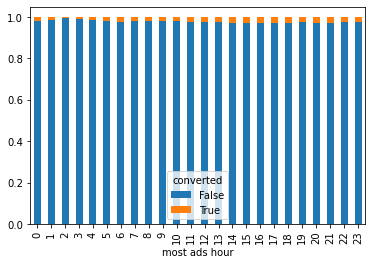

In [56]:
## Crosstab on hour
ct_conversion_hour = pd.crosstab(df['most ads hour'], df['converted'], normalize = 'index')
print(ct_conversion_hour.sort_values(by = True, ascending = False))

## Visualization to get the stacked plot chart
ct_conversion_hour.plot.bar(stacked = True);

Similar to **`'mosts ads day'`** we are able to utilize the **`'most ads hour'`** to modify our business decisions to when customers are most responsive, improving return on ad spend. Knowing that conversions spike at **3 PM**(**3.08%** conversion), **4 PM**(**2.98%**), and **8 PM**(**2.97%**) lets you focus ad spend during these “power hours,” align inventory and support for expected sales surges, and ensure A/B variants are shown evenly across high- and low-converting periods to avoid confounding the test results.   

Using `Seaborn (sns)`, we’ll create a box plot that compares the distribution of **`total_ads`** between converted and non-converted users, providing a clear visual of how ad exposure differs across the two groups, ads and psa. 


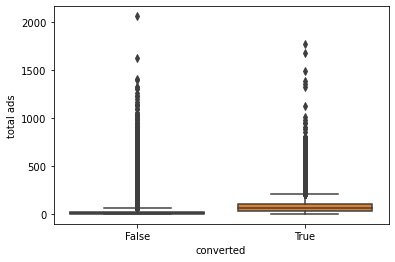

In [57]:
sns.boxplot(x = 'converted', y = 'total ads', data = df);

The distribution is noticeably skewed, so we’ll remove extreme outliers to gain a clearer view of the underlying pattern. Observations with **`total_ads`** greater than 50 will be excluded to reduce the influence of extreme outliers and yield a clearer view of the distribution.


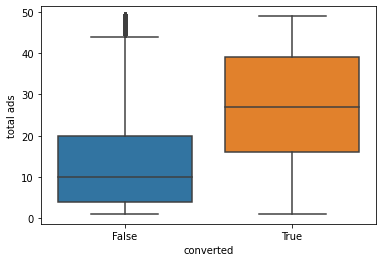

In [58]:
sns.boxplot(x = 'converted', y = 'total ads', data = df[df['total ads'] < 50]);

The box plot indicates a noticeable difference in the median **`total_ads`** between converted and non-converted users, suggesting a potential treatment effect that should be confirmed with formal statistical testing. Informally we can see that the median **false** conversion is around **10** while the median **true** conversion is around **25**. 

### Statistical Tests

Choosing the right statistical tests ensures that any observed difference between your A/B groups is real and not an artifact of the data’s shape or variance. For **categorical outcomes** such as “converted / not converted,” a **chi-square test** (or Fisher’s exact test for small counts) evaluates whether the distribution of conversions differs across variants. When comparing **numeric metrics**—for example, the number of ads shown to converters vs. non-converters—you first check assumptions. The **Shapiro–Wilk test** assesses whether each group’s values are approximately normally distributed, while **Levene’s test** confirms whether the two groups share similar variances. If both normality and equal-variance assumptions hold, an independent-samples **t-test** provides the most powerful comparison of means. If either assumption fails, the non-parametric **Mann–Whitney U test** (also called Wilcoxon rank-sum) compares the medians or rank distributions without requiring normality. Running these tests in the proper order guards against misleading p-values and lends credibility to your A/B conclusions.


Import `chi2_contingency` from `scipy.stats` to run chi-square tests on contingency tables.


In [59]:
## Statistical Library packages
from scipy.stats import chi2_contingency

A chi-square test of independence is appropriate because both variables under study—such as **`test group`** (Ad vs. PSA) and **`converted`** (Converted vs. Not Converted)—are categorical. By placing their counts in a contingency table, the test compares the observed cell frequencies with those expected if the variables were unrelated; a low p-value then indicates that conversion rates differ significantly across groups. We will apply the same chi-square framework to examine whether conversion status is associated with two additional categorical factors: **`most_ads_day`** (the day of the week with the highest ad exposure for each user) and **`most_ads_hour`** (the hour with the highest ad exposure). This will reveal whether the timing of ad impressions influences the likelihood of converting.

In [60]:
## Statistically significant threshold 
alpha = 0.05

for variable in df_cat.columns:
    if variable != 'converted':
        # create a contingency table (cross-tabulation)
        contingency_table = pd.crosstab(df_cat[variable], df_cat['converted'])
        
        # perform chi-squared test
        chi2, p, _, _ = chi2_contingency(contingency_table)
        
        # Display results
        print(f'\nChi-squared test for {variable} vs. converted:')
        print(f'Chi-squared value: {chi2}')
        print(f'p-value: {p}')
        
        # Check for significance 
        if p < alpha: 
            print(f'The difference in conversion rates across {variable} is statistically significant.')
        else: 
            print(f'There is no significant difference in conversion rates across {variable}.')
        


Chi-squared test for test group vs. converted:
Chi-squared value: 54.005823883685245
p-value: 1.9989623063390075e-13
The difference in conversion rates across test group is statistically significant.

Chi-squared test for most ads day vs. converted:
Chi-squared value: 410.0478857936585
p-value: 1.932184379244731e-85
The difference in conversion rates across most ads day is statistically significant.

Chi-squared test for most ads hour vs. converted:
Chi-squared value: 430.76869230822086
p-value: 8.027629823696771e-77
The difference in conversion rates across most ads hour is statistically significant.


At the 0.05 significance level, the chi-square tests reveal that conversion status is significantly associated with all three factors—**`test group`** assignment, **`most ads day`**, and **`most ads hour`** indicating that each of these variables meaningfully influences the likelihood of a user converting.

In [61]:
## Check the columns
df_cat.columns

Index(['test group', 'converted', 'most ads day', 'most ads hour'], dtype='object')

We will first run the **Shapiro–Wilk** test on each group to assess whether the metric of interest follows a normal distribution. The outcome of this normality check will dictate whether we proceed with parametric tests (such as an independent-samples t-test) or switch to a non-parametric alternative (e.g., Mann–Whitney U). Next, we will apply **Levene’s** test to evaluate the homogeneity of variances between groups; its result further refines which statistical procedure is most appropriate and whether an equal- or unequal-variance version of the t-test is warranted.

In [62]:
## Import Library packages
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu

In [63]:
## Step 1: Check Assumptions
# Normality assumption 
shapiro_stat_true, shapiro_p_value_true = shapiro(df[df['converted'] == True]['total ads'])
shapiro_stat_false, shapiro_p_value_false = shapiro(df[df['converted'] == False]['total ads'])

print(f'Shapiro-Wilk test for normality (True group): p-vlaue = {shapiro_p_value_true}')
print(f'Shapiro-Wilk test for normality (False group): p-vlaue = {shapiro_p_value_false}')

# Equality of variance assumption
levene_stat, levene_p_value = levene(df[df['converted']]['total ads'], df[~df['converted']]['total ads'])
print(f"Levene's test for eaquality of variances: p-value = {levene_p_value}")

Shapiro-Wilk test for normality (True group): p-vlaue = 0.0
Shapiro-Wilk test for normality (False group): p-vlaue = 0.0
Levene's test for eaquality of variances: p-value = 0.0


In [64]:
## Step 2: Perform a Suitable Test

# Significance Threshold 
aplha = 0.05

if shapiro_p_value_true > alpha and shapiro_p_value_false > alpha and levene_p_value > alpha: 
    # Assumptions met - use t-test for means 
    t_stat, t_p_value = ttest_ind(df[df['converted']]['total ads'], df[~df['converted']]['total ads'])
    print(f"Independent two-sample t-test: p-value = {t_p_value}")
    
else: 
    # Assumptions not met - use Mann-Whitney U Test for medians 
    u_stat, u_p_value = mannwhitneyu(df[df['converted']]['total ads'], df[~df['converted']]['total ads'])
    print(f"Mann-Whitney U Test: p-value = {u_p_value}")

Mann-Whitney U Test: p-value = 0.0


The analysis script was set up to choose between an independent-samples t-test and a Mann–Whitney U test. After Shapiro–Wilk indicated non-normality and Levene’s test showed unequal variances, the code automatically bypassed the t-test and executed the non-parametric Mann–Whitney U test. This test confirmed a statistically significant difference in the conversion metric between users exposed to the ad and those who were not.


### Conclusion
Our analysis shows that each examined factor plays a critical role in driving conversions. First, users exposed to the advertisement converted at a significantly higher rate than those who did not see it, **`'total ads'`**. Second, conversion likelihood varied by day of impression, confirming that the **`'most ads day'`** matters for ad effectiveness. Third, the time window with the highest ad density also corresponded to a meaningful lift in conversions, **`'most ads hour'`**. Finally, ad frequency proved important: repeated exposures further increased the probability of purchase. Together, these findings highlight that *whether*, *when*, and *how often* an ad is shown all materially affect performance—and should therefore be optimized in future campaigns.
